In [1]:
#!/usr/bin/env python
# coding: utf-8

# # Reduced Displacement calculation tutorial
# 
# # 1. Header


import os
import sys
import time
import obspy
from obspy.clients.filesystem.sds import Client as sdsclient
from obspy.core.inventory.inventory import read_inventory

PROJECT_DIR = os.path.join('..','..')
LIB_DIR = os.path.join(PROJECT_DIR,'src','lib')
sys.path.append(LIB_DIR)
from SAM import DSAM, DR, DRS
import InventoryTools

CONTINUOUS_DATA_DIR = os.path.join(PROJECT_DIR, 'data', 'continuous')
SAM_DIR = os.path.join(CONTINUOUS_DATA_DIR, 'SAM')

#####################################################################################

startTime = obspy.core.UTCDateTime(2001,2,25,0,0,0)
endTime = obspy.core.UTCDateTime(2001,3,6,0,0,0)
secondsPerDay = 60 * 60 * 24
numDays = (endTime-startTime)/secondsPerDay

In [ ]:
# # 2. Read DSAM archive and plot

dsamMV = DSAM.read(startTime, endTime, SAM_DIR=SAM_DIR, sampling_interval=60, ext='pickle')
'''
#dsamMV.plot(metrics='median', kind='stream', outfile='plots/DSAM_median.png')
for metric in ['mean', 'min', 'max', 'std', 'VLP', 'LP', 'VT', 'fratio']:
    dsamMV.plot(metrics=metric, kind='stream', outfile=f'plots/DSAM.png') # metric added by plot
'''

In [ ]:
# # 3. Compute DRS

invMVO = read_inventory('../../data/response/MV.xml')
source = {'lat':16.71111, 'lon':-62.17722}

DRmv = dsamMV.reduce(invMVO, source, surfaceWaves=False, Q=None)
DRSmv = dsamMV.reduce(invMVO, source, surfaceWaves=True, Q=None)

In [ ]:
DRmv.write(SAM_DIR=SAM_DIR, overwrite=True)
DRmvHourly = DRmv.downsample(new_sampling_interval=3600)
DRmvHourly.iceweb_plot(outfile='plots/DR_Hourly.png')


DRSmv.write(SAM_DIR=SAM_DIR, overwrite=True)
DRSmvHourly = DRSmv.downsample(new_sampling_interval=3600)
DRSmvHourlyZ = DRSmvHourly.select(component='Z')
DRSmvHourlyZ.iceweb_plot(outfile='plots/DRS_Hourly.png', linestyle='.')
for metric in ['median', 'mean', 'min', 'max', 'std', 'VLP', 'LP', 'VT', 'fratio']:
    DRSmvHourlyZ.iceweb_plot(metric=metric, outfile=f'plots/DRS_hourly_{metric}.png', linestyle='.')

In [ ]:
DRmv = DR.read(startTime, endTime, SAM_DIR=SAM_DIR, sampling_interval=60, ext='pickle')
mediansDR, station_correctionsDR = DRmv.examine_spread()

../../data/continuous/SAM/DRS_*_2001_60s.pickle
['../../data/continuous/SAM/DRS_MV.MBBY..BHZ_2001_60s.pickle', '../../data/continuous/SAM/DRS_MV.MBMH..SHN_2001_60s.pickle', '../../data/continuous/SAM/DRS_MV.MBLG..SHZ_2001_60s.pickle', '../../data/continuous/SAM/DRS_MV.MBGB..BHN_2001_60s.pickle', '../../data/continuous/SAM/DRS_MV.MBBY..BHE_2001_60s.pickle', '../../data/continuous/SAM/DRS_MV.MBGH..BHN_2001_60s.pickle', '../../data/continuous/SAM/DRS_MV.MBRY..BHN_2001_60s.pickle', '../../data/continuous/SAM/DRS_MV.MBWH..SHZ_2001_60s.pickle', '../../data/continuous/SAM/DRS_MV.MBMH..SHE_2001_60s.pickle', '../../data/continuous/SAM/DRS_MV.MBGB..BHE_2001_60s.pickle', '../../data/continuous/SAM/DRS_MV.MBRY..BHZ_2001_60s.pickle', '../../data/continuous/SAM/DRS_MV.MBGH..BHZ_2001_60s.pickle', '../../data/continuous/SAM/DRS_MV.MBBY..BHN_2001_60s.pickle', '../../data/continuous/SAM/DRS_MV.MBMH..SHZ_2001_60s.pickle', '../../data/continuous/SAM/DRS_MV.MBSS..SHZ_2001_60s.pickle', '../../data/continuou

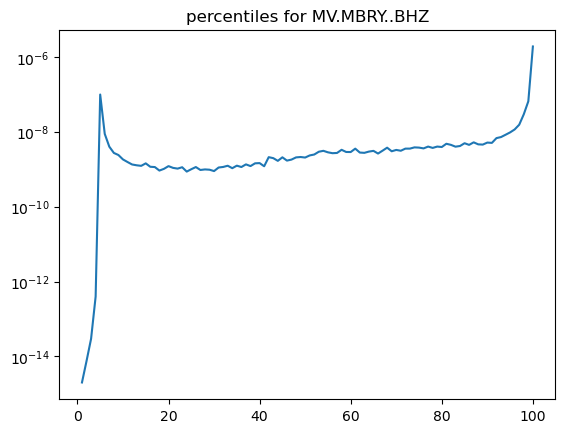

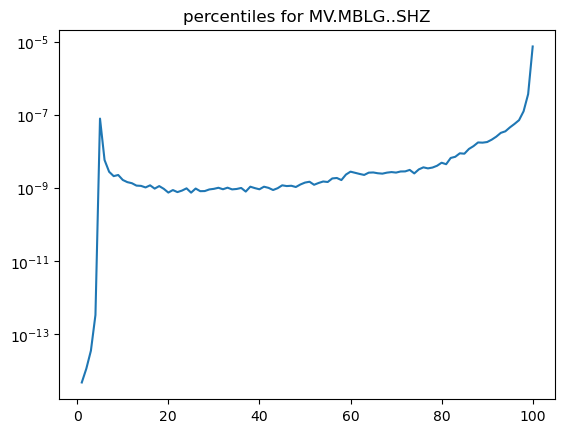

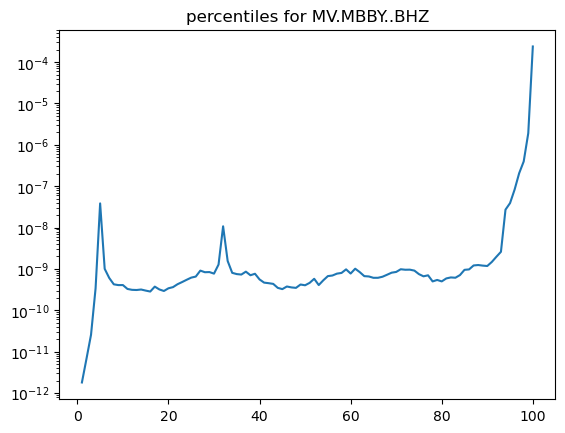

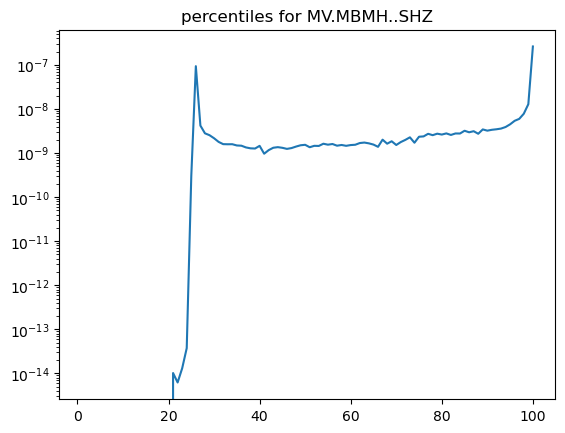

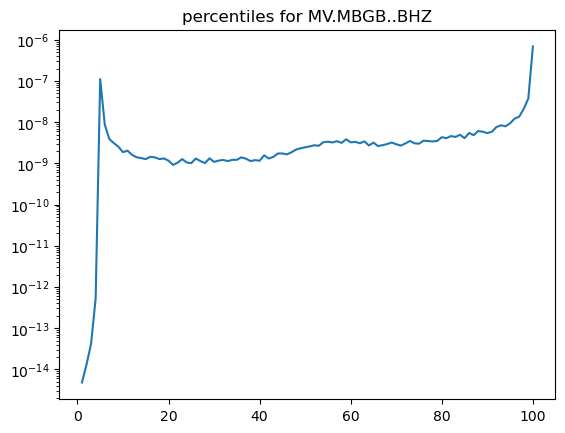

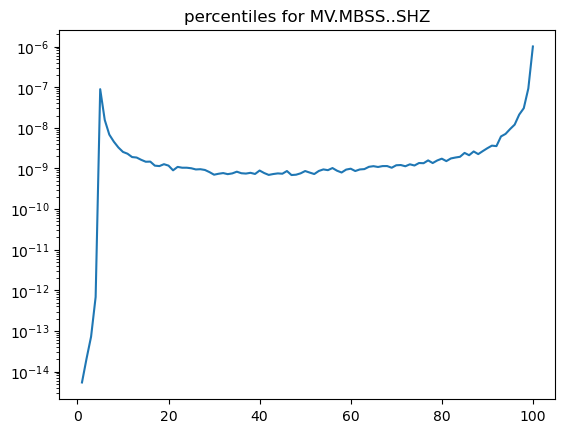

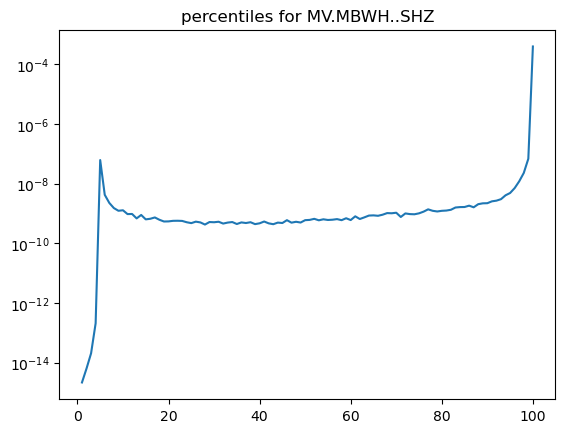

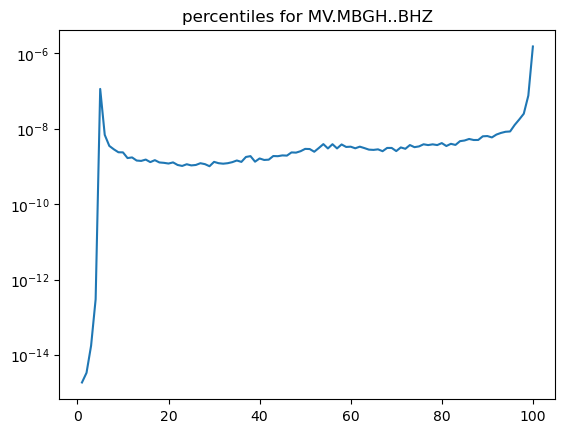

In [2]:
DRSmv = DRS.read(startTime, endTime, SAM_DIR=SAM_DIR, sampling_interval=60, ext='pickle')
DRSmv.show_percentiles('median')

In [3]:
mediansDRS, station_correctionsDRS = DRSmv.examine_spread(low_percentile=80, high_percentile=90)


metric:  mean
MV.MBBY..BHE, median: 4.137e-07, station correction: 0.895
MV.MBRY..BHN, median: 5.696e-07, station correction: 0.650
MV.MBRY..BHZ, median: 3.450e-07, station correction: 1.073
MV.MBLG..SHZ, median: 3.301e-07, station correction: 1.122
MV.MBMH..SHN, median: 2.715e-07, station correction: 1.364
MV.MBGH..BHN, median: 6.313e-07, station correction: 0.587
MV.MBBY..BHN, median: 4.609e-07, station correction: 0.804
MV.MBBY..BHZ, median: 1.015e-07, station correction: 3.650
MV.MBMH..SHZ, median: 2.397e-07, station correction: 1.545
MV.MBGB..BHZ, median: 3.571e-07, station correction: 1.037
MV.MBSS..SHZ, median: 2.345e-07, station correction: 1.579
MV.MBWH..SHZ, median: 1.536e-07, station correction: 2.412
MV.MBRY..BHE, median: 5.519e-07, station correction: 0.671
MV.MBGH..BHE, median: 6.729e-07, station correction: 0.550
MV.MBMH..SHE, median: 2.433e-09, station correction: 152.242
MV.MBGB..BHN, median: 6.528e-07, station correction: 0.567
MV.MBGB..BHE, median: 6.644e-07, statio

dataframes found. ignoring other arguments.
dataframes found. ignoring other arguments.
min
mean
max
median
std
VLP
LP
VT
fratio


/mnt/RAIDZ/home3/thompsong/work/PROJECTS/MESS2024_Glenn/src/10_RSAM/../../src/lib/SAM.py:812: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.xticks(rotation=90)


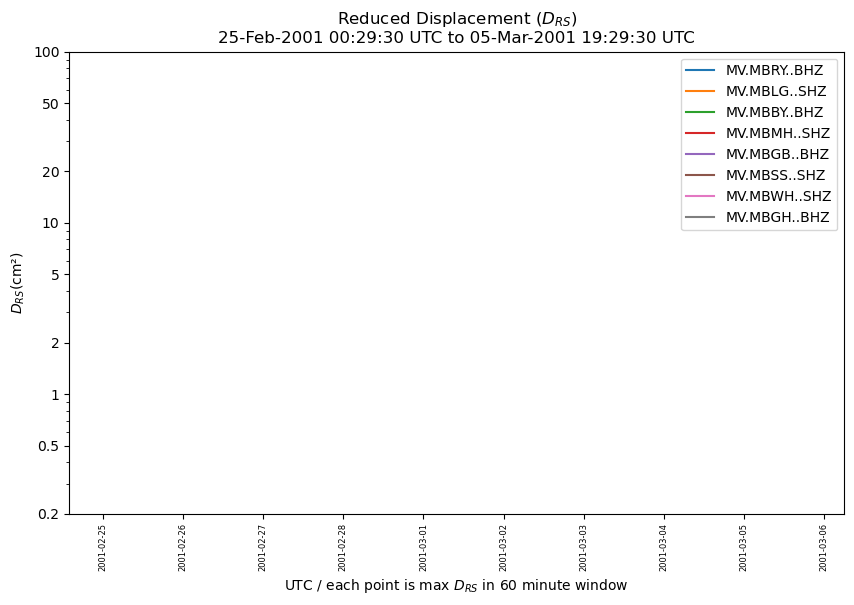

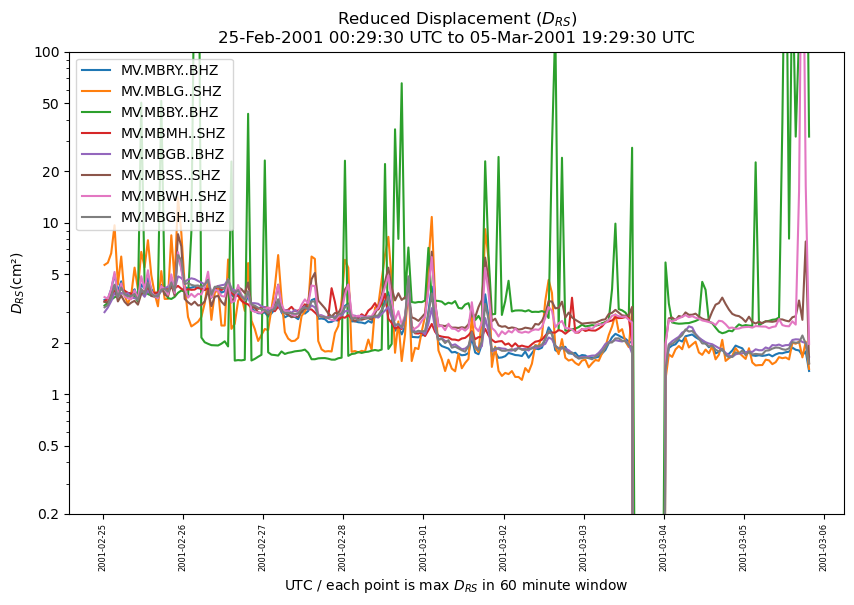

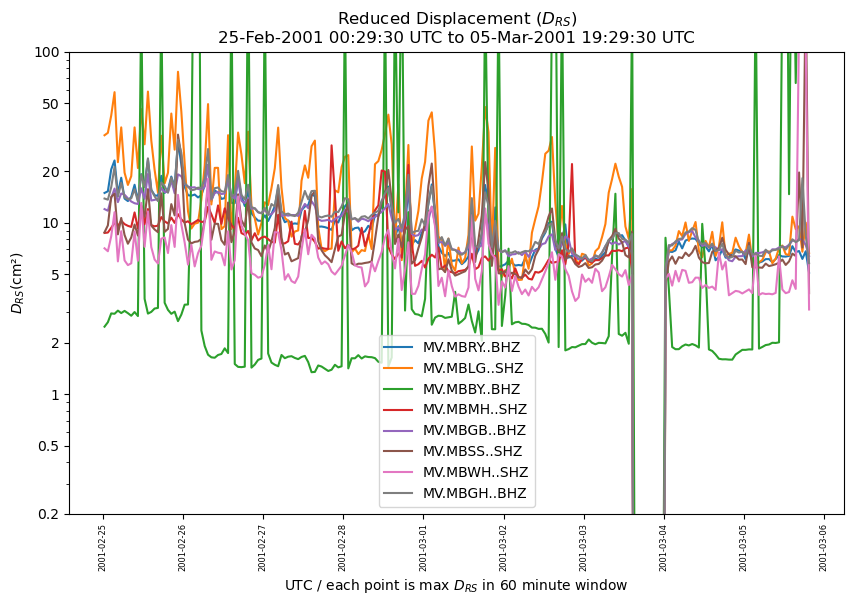

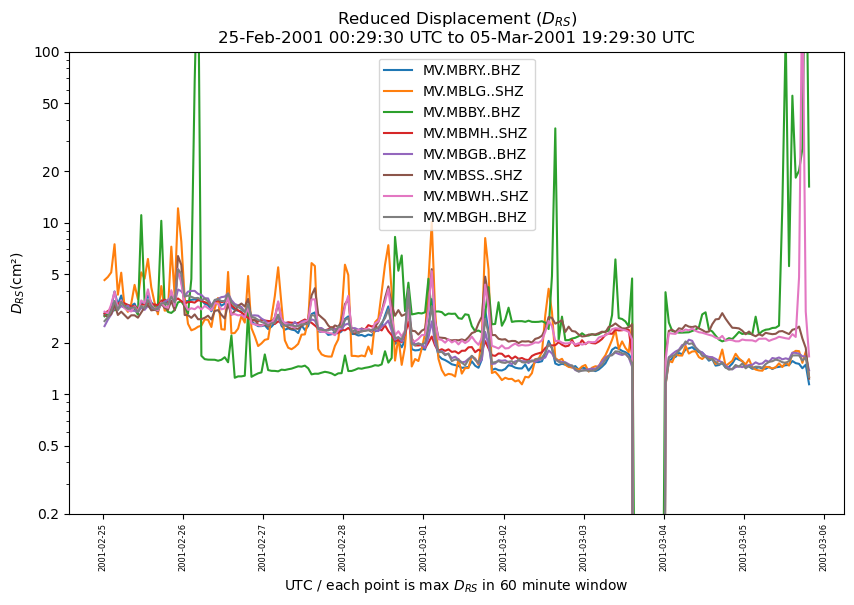

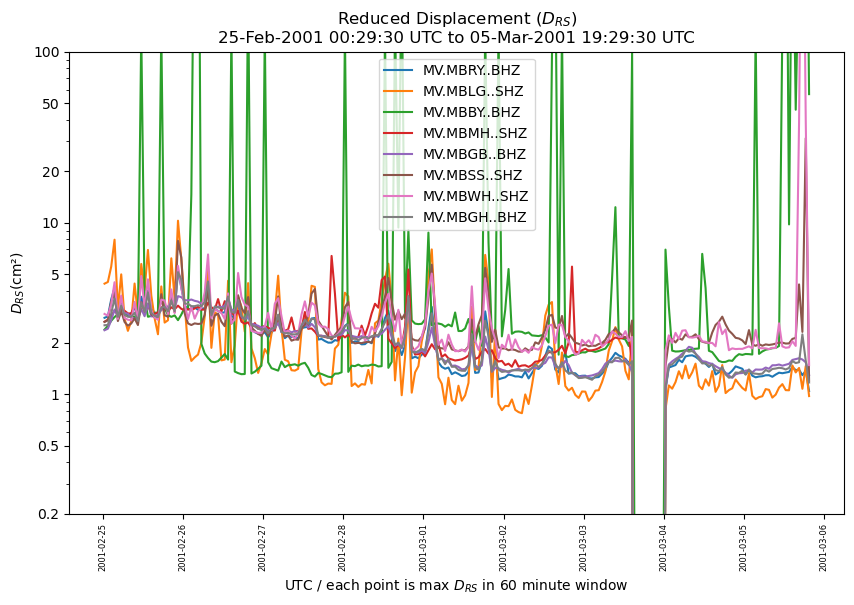

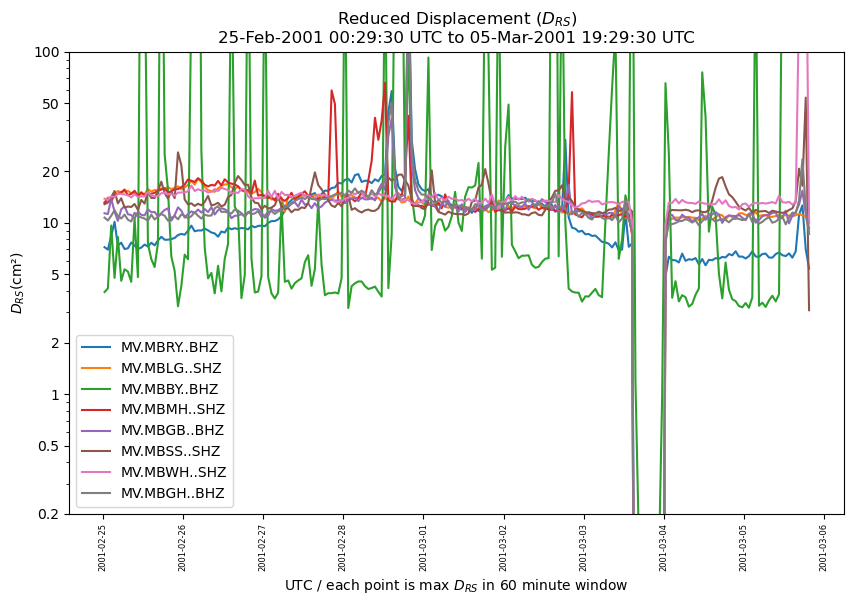

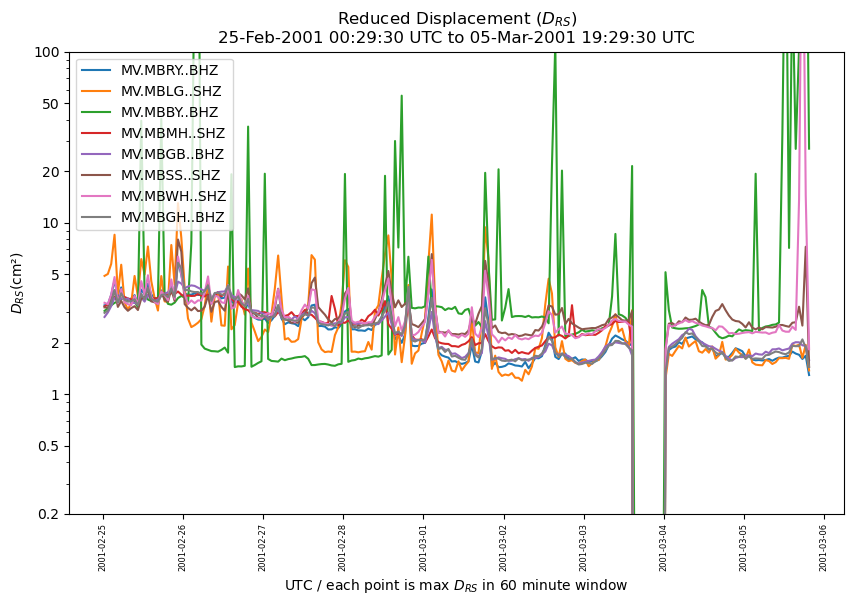

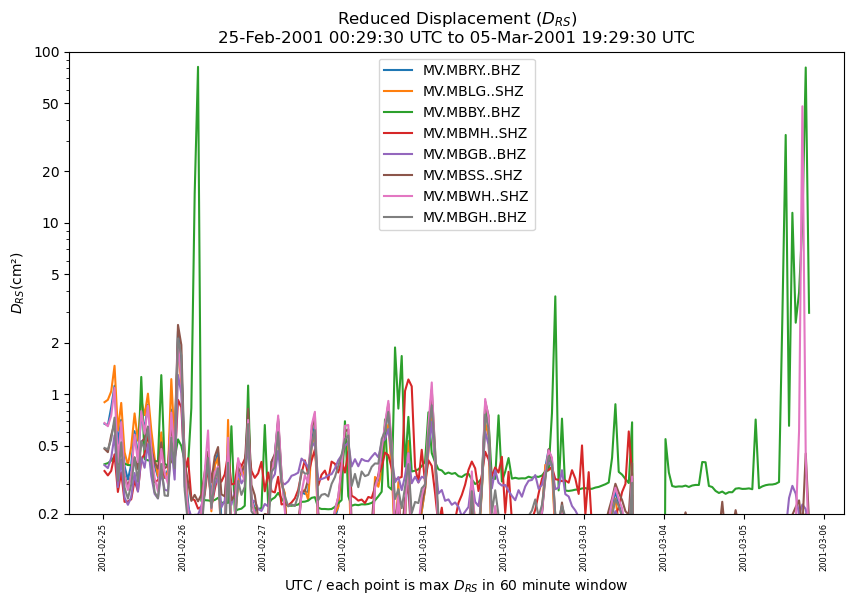

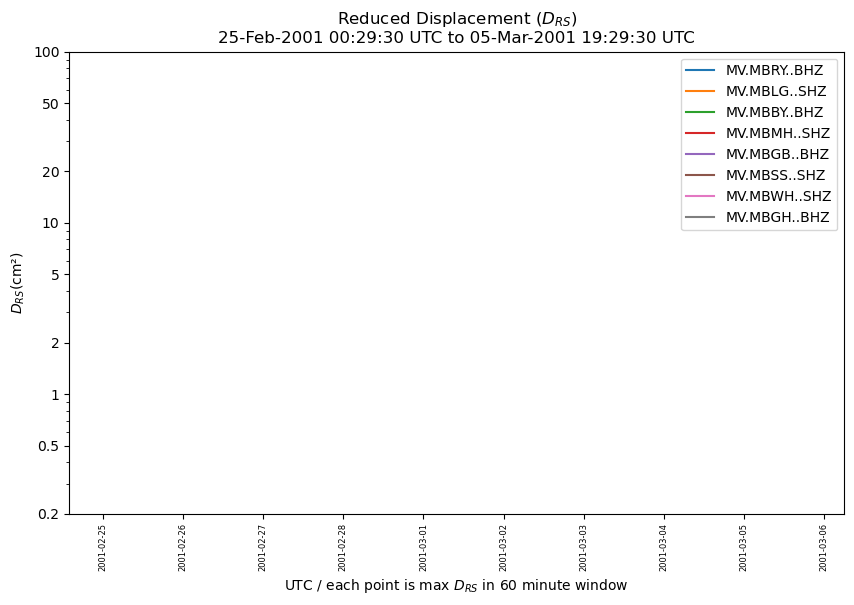

In [4]:
# apply station corrections
DRSmv.apply_station_corrections(station_correctionsDRS)
DRSmvHourly = DRSmv.downsample(new_sampling_interval=3600)
DRSmvHourlyZ = DRSmvHourly.select(component='Z')
#DRSmvHourlyZ.iceweb_plot(outfile='plots/DRS_Hourly_corrected.png', linestyle='.')
for metric in DRSmvHourlyZ.get_metrics():
    print(metric)
    DRSmvHourlyZ.iceweb_plot(metric=metric, outfile=f'plots/DRS_hourly_{metric}_corrected.png', linestyle='-')

In [ ]:
print(prange)